In [7]:
#Import Necessary Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load the dataset
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

### Check Data Quality
Check data quality. Most common check is to check missing values. We can do some basic data cleaning like cleaning up currency field.
- Check null values
- Currency field need to be converted to float, remove '$' or ',', sometimes negative value is enclosed in ()


##### Task1: Check out Basic Dataframe Info

Hint: info() function.

Discuss missing values in the dataframe.

In [10]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [11]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This shows there are missing values in the Age, Cabin and Embarked columns.

##### Task2: Clean up Fare, Convert to Float
Strip "$" from Fare, convert datatype to float.

In [14]:
df_titanic['Fare'] = df_titanic['Fare'].replace('[\$,]', '', regex=True).astype(float)

#Display the modified DataFrame
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The resulting dataframe shows '$' has been removed from the Fare column.

In [15]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 The resulting dataframe shows the Fare column has been converted into a float datatype.

##### Task3: Check out statistics of Numeric Columns

Hint:describe() function.

Discuss:
- Age, SibSp, Parch, Fare statistics
- What does mean Survived mean?

In [16]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age:
The average age of passengers was approximately 29.7 years.
The youngest passenger was 0.42 years old.
The oldest passenger was 80 years old.

SibSp:
Some passengers had no siblings or spouses aboard
The highest number of siblings or spouses aboard was 8.

Parch:
Some passengers had no parents or children aboard.
The highest number of parents or children aboard was 6.

Fare:
The average fare paid by passengers was approximately $32.20.
The minimum fare was $0.00
The highest fare paid was $512.33.

What does mean Survived mean?
The mean for the "Survived" column is approximately 0.38. This means on average about 38% of the passengers survived the Titanic disaster.

### Exploratory Data Analysis - EDA
EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

#### Types Of Features
##### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.

##### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Fare

### Categorical Features
We will analysis Survived as univariant. Relationship between Sex and Survival, Embarked and Survivval.

#### How many survived
Bar chart on Survived column. There are multiple ways to do the bar chart. We will demonstrate 2 ways here, seaborn countplot and pandas series bar.

##### Task4: Plot bar chart for Perished vs. Survived
Plot bar chart for Survived column. Survived=0 means perished, Survived=1 means Survived.

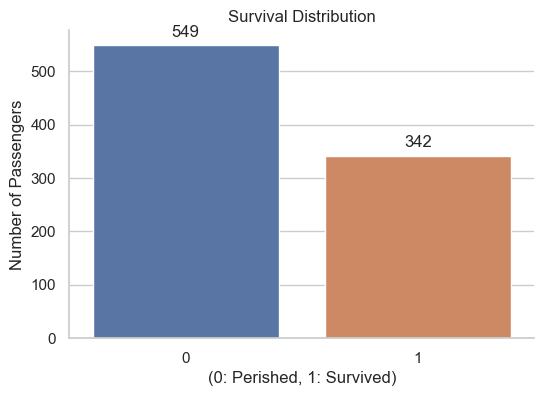

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

#This counts the occurrences of each unique value in the "Survived" column
survival_counts = df_titanic['Survived'].value_counts()

#Create a bar plot
ax = sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Survival Distribution')
plt.xlabel('(0: Perished, 1: Survived)')
plt.ylabel('Number of Passengers')

#Add labels for total count on top of the bars
for i, count in enumerate(survival_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')
sns.despine()
plt.show()

The plot shows 549 passengers perished in the disaster and 342 passengers survived.

#### Relationship between Sex and Survival
We may use aggregation function or plot.

Next 2 cells demonstate aggregate function.

The following cell demonstrates bar plot and countplot.


##### Task5: Plot Bar Chart on Number of Male and Femal Passengers

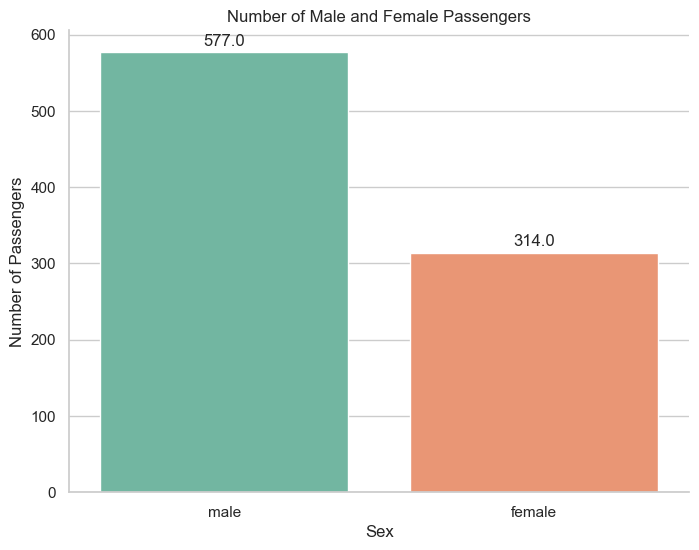

In [55]:
plt.figure(figsize=(8, 6))

#This creates a count plot for the "Sex" column
ax = sns.countplot(x='Sex', data=df_titanic, palette='Set2')
plt.title('Number of Male and Female Passengers')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

#Add labels for total count on top of the bars with reduced height
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='bottom')
sns.despine()
plt.show()

##### Task6: Groupby Sex to Find Survival Rate of Male and Female

In [26]:
#This groups by 'Sex' and calculates the mean of 'Survived' column
survival_rate_by_sex = df_titanic.groupby('Sex')['Survived'].mean()
print(survival_rate_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


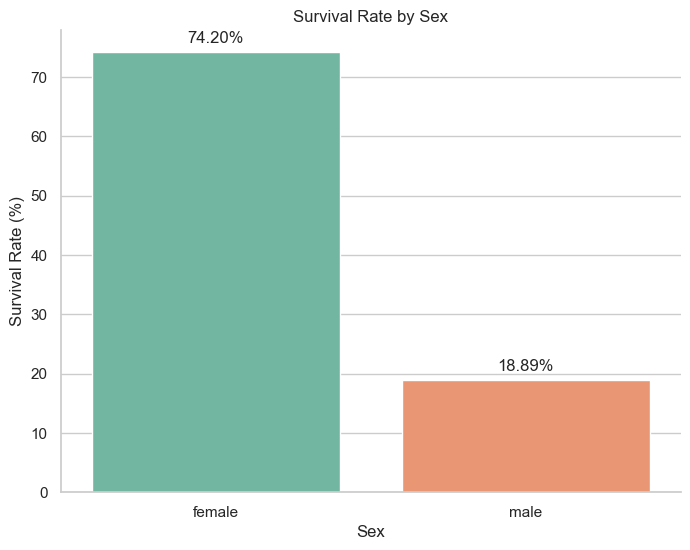

In [58]:
#This calculates survival rate by sex
survival_rate_by_sex = df_titanic.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

#Create a bar plot for survival rate by sex
ax = sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values, palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')

#Add labels for total survival rate on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                ha='center', va='bottom')
sns.despine()
plt.show()

##### Task7: Plot Perished vs. Survived Bar for Male and Femail
We will use seaborn countplot() again, but set argument `hue` to 'Survived'.

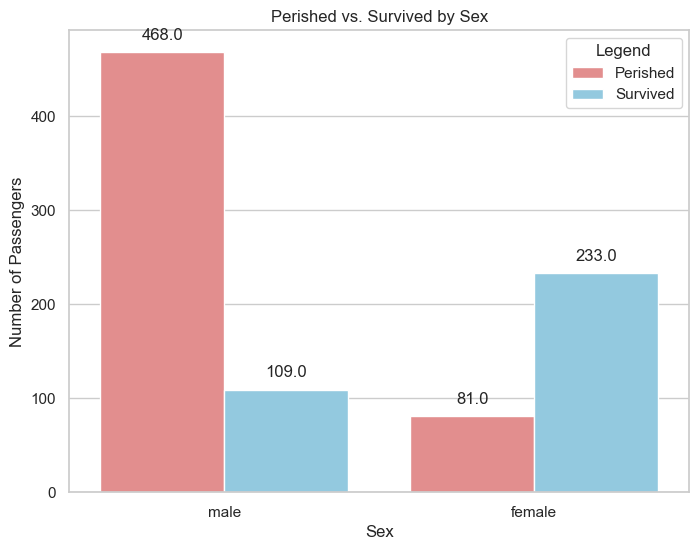

In [31]:
plt.figure(figsize=(8, 6))

#This creates a count plot
ax = sns.countplot(x='Sex', hue='Survived', data=df_titanic, palette={0: 'lightcoral', 1: 'skyblue'})
plt.title('Perished vs. Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')

#Add labels for total count on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 10),
                ha='center', va='bottom')
plt.legend(title='Legend', labels=['Perished', 'Survived'])
plt.show()

The number of men on the ship is lot more than the number of women. Still the number of survived women is almost twice the number of survived males. Majority women survived while vast majority of men perished.

#### Pclass and Survival
##### Task 8: List survival rate of each Pclass 

In [33]:
#This groups by 'Pclass' and calculates the mean of 'Survived' column
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


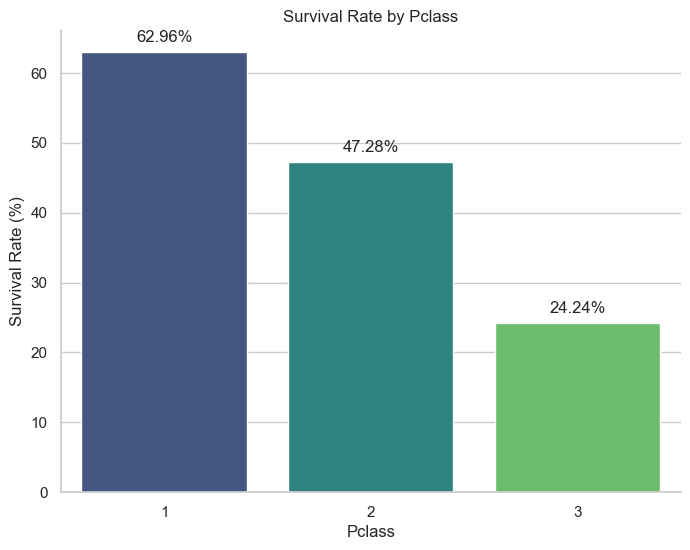

In [60]:
#This calculates survival rate by Pclass
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

#Create a bar plot for survival rate by Pclass
ax = sns.barplot(x=survival_rate_by_pclass.index, y=survival_rate_by_pclass.values, palette='viridis')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')

#Add labels for total survival rate on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height() + 1),
                ha='center', va='bottom')
sns.despine()
plt.show()

##### Task 9: Plot Perished vs. Survived for each Pclass

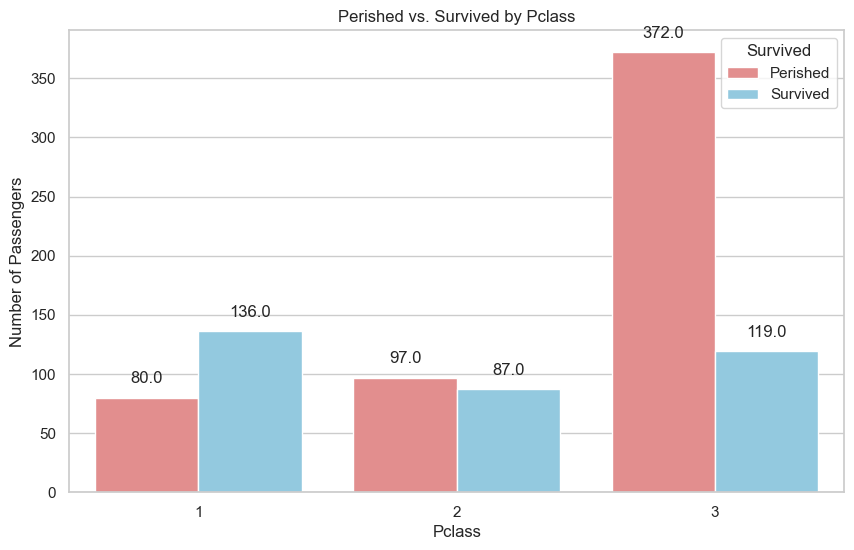

In [40]:
plt.figure(figsize=(10, 6))

#This creates a count plot
ax = sns.countplot(x='Pclass', hue='Survived', data=df_titanic, palette={0: 'lightcoral', 1: 'skyblue'})
plt.title('Perished vs. Survived by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

#Add labels for total count on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 10),
                ha='center', va='bottom')
plt.legend(title='Survived', labels=['Perished', 'Survived'])
plt.show()

### Continuous Features


#### Univariate Distribution Plot
There are multiple ways to do histogram. I will demonstrate 3 ways.
- ax.hist(): can not handle NnN value
- seaborn.distplot(): can not handle NaN. Has KDE(kernel density estimation) by default.
- pd.Sereis.hist(): simplest and can handle NaN by default

##### Task 10: Plot histogram for Age
Use pandas Series hist() function which handles missing value.

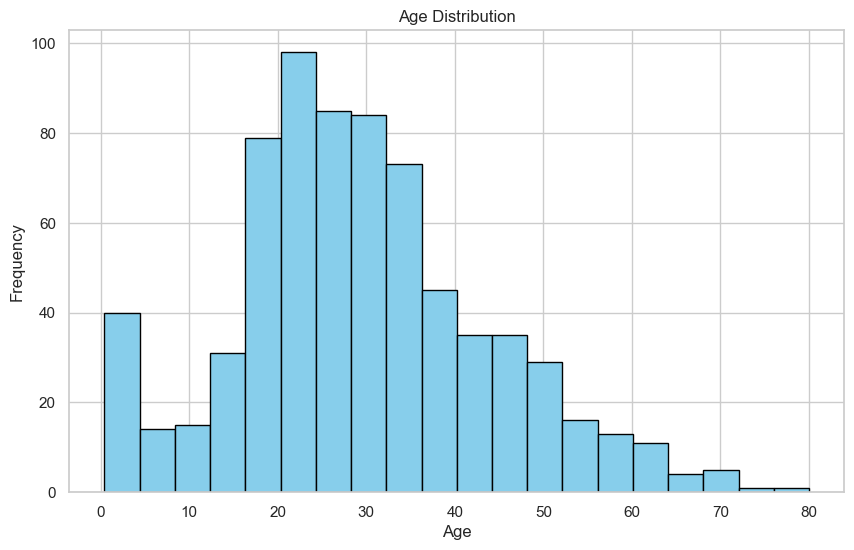

In [63]:
plt.figure(figsize=(10, 6))

#This creates a histogram for the 'Age' column
df_titanic['Age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### Task11: Stack age histogram of survived on top of overall age histogram
Plot histogram for Age, then filter out survived passenger and plot histogram for Age on same axis. Set different color and label.

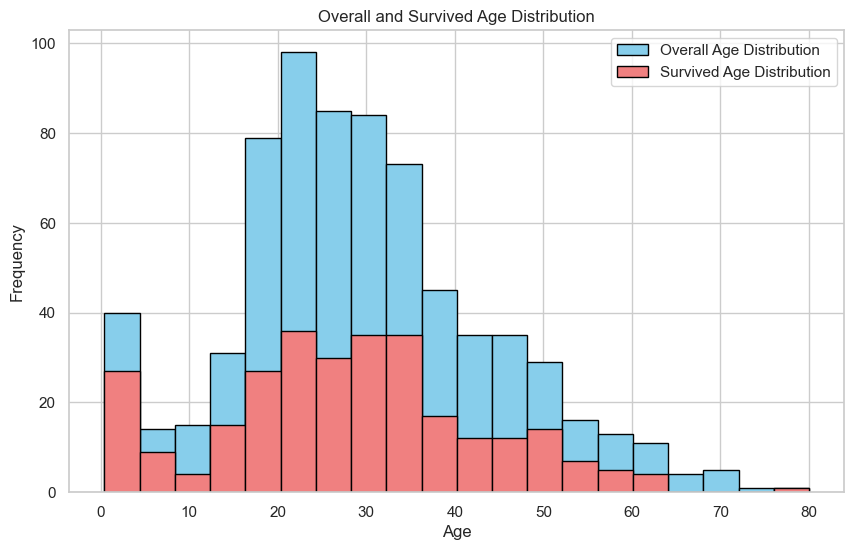

In [43]:
plt.figure(figsize=(10, 6))

#Plot overall age histogram
df_titanic['Age'].hist(bins=20, color='skyblue', edgecolor='black', label='Overall Age Distribution')

#Filter DataFrame for survived passengers
survived_df = df_titanic[df_titanic['Survived'] == 1]

#Plot age histogram for survived passengers on the same axis
survived_df['Age'].hist(bins=20, color='lightcoral', edgecolor='black', label='Survived Age Distribution')
plt.title('Overall and Survived Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Children have higher survival rate.

[Back to Top](#Table-of-Contents)
